# Importing modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Reading the datasets

In [3]:
# The two datsets which are csv are read from the folder directly 
df=pd.read_csv('./housing_in_london_monthly_variables.csv')
df1=pd.read_csv('./housing_in_london_yearly_variables.csv')
print('The rows and columns are:',df.shape)
print(df.head())

The rows and columns are: (13549, 7)
         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1  


In [4]:
print(df1.shape)
print(df1.head())

(1071, 12)
        code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   
1  E09000002  barking and dagenham  1999-12-01        21480.0   
2  E09000003                barnet  1999-12-01        19568.0   
3  E09000004                bexley  1999-12-01        18621.0   
4  E09000005                 brent  1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                NaN       48922             0           6581.0   
1                NaN       23620             3         162444.0   
2                NaN       23128             8         313469.0   
3                NaN       21386            18         217458.0   
4                NaN       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             NaN        NaN           NaN             1  
1             NaN        NaN           NaN             1  
2             NaN 

# Data Analysis

In [5]:
print(df.describe())
print(df1.describe())

       average_price    houses_sold  no_of_crimes  borough_flag
count   1.354900e+04   13455.000000   7439.000000  13549.000000
mean    2.635197e+05    3893.994129   2158.352063      0.733338
std     1.876175e+05   12114.402476    902.087742      0.442230
min     4.072200e+04       2.000000      0.000000      0.000000
25%     1.323800e+05     247.000000   1623.000000      0.000000
50%     2.229190e+05     371.000000   2132.000000      1.000000
75%     3.368430e+05    3146.000000   2582.000000      1.000000
max     1.463378e+06  132163.000000   7461.000000      1.000000
       median_salary  life_satisfaction  population_size  number_of_jobs  \
count    1049.000000         352.000000     1.018000e+03    9.310000e+02   
mean    27977.792183           7.485057     6.042576e+06    3.188095e+06   
std      6412.807487           0.198451     1.526810e+07    8.058302e+06   
min     15684.000000           7.000000     6.581000e+03    4.700000e+04   
25%     23857.000000           7.350000     

In [33]:
print(df.info(),df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null 

# Dealing with Null values 

In [34]:
print(df.isnull().sum())
print(df1.isnull().sum())

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64
code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64


## On the monthly data

##### As there are lot of null values in no_of_crimes column, mean imputation is done with the reference of area column

### No. of crimes data evaluation

In [35]:
null_count_areawise = df.groupby('area')['no_of_crimes'].apply(lambda x: x.isnull().sum())
no_null_count_areawise = df.groupby('area')['no_of_crimes'].apply(lambda x: x.notnull().sum())
total = df.groupby('area')['no_of_crimes'].count()
# Print the count of null values for each area
print("Count of null values for each area in 'no_of_crimes':")
df_null = pd.concat([null_count_areawise,no_null_count_areawise],axis=1)
df_null.columns = ['Null values in no_of_crimes','Non_null_no_of_crimes']
df_null

Count of null values for each area in 'no_of_crimes':


,Null values in no_of_crimes,Non_null_no_of_crimes
area,,
barking and dagenham,72,229
barnet,72,229
bexley,72,229
brent,72,229
bromley,72,229
camden,72,229
city of london,190,111
croydon,72,229
ealing,72,229


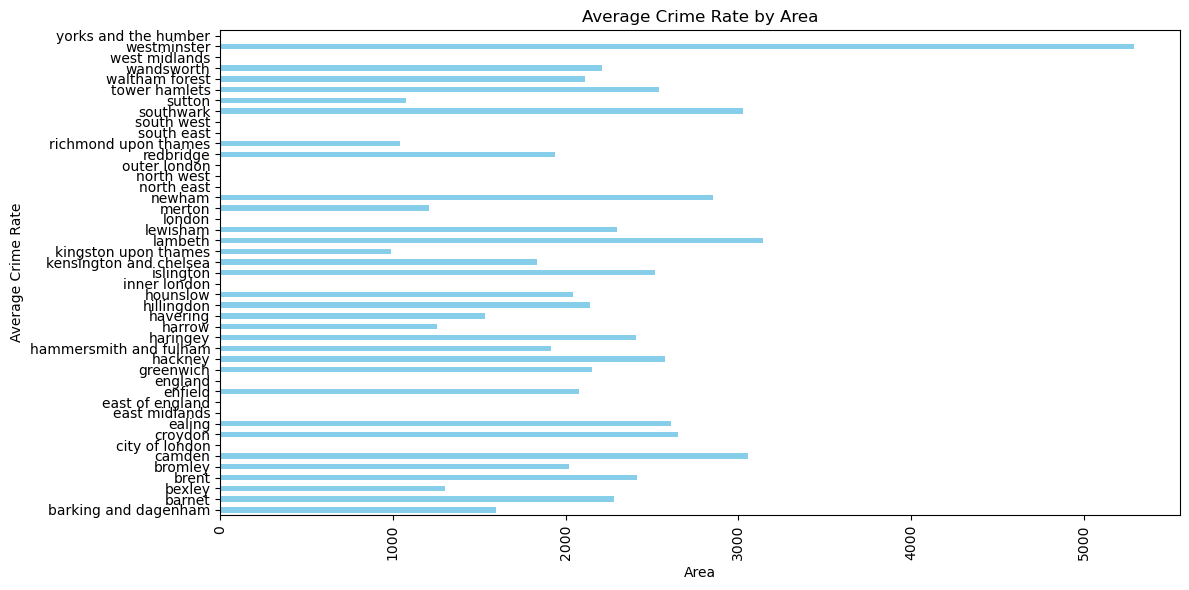

In [36]:
crime_rate_by_area = df.groupby('area')['no_of_crimes'].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
crime_rate_by_area.plot(kind='barh', color='skyblue')
plt.xlabel('Area')
plt.ylabel('Average Crime Rate')
plt.title('Average Crime Rate by Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### The average crime rate in different areas is shown above but the highest crime rate is in west minister.

In [6]:
# Calculating averages for 'no_of_crimes' and 'houses_sold' columns for each area
mean_values_by_area = df.groupby('area')[['no_of_crimes', 'houses_sold']].mean()

# Updating null values in 'no_of_crimes' column with mean_values_by_area
for area, mean_value in mean_values_by_area['no_of_crimes'].items():
    df.loc[df['area'] == area, 'no_of_crimes'] = df.loc[df['area'] == area, 'no_of_crimes'].fillna(mean_value)

# Updating null values in 'houses_sold' column with mean_values_by_area
for area, mean_value in mean_values_by_area['houses_sold'].items():
    df.loc[df['area'] == area, 'houses_sold'] = df.loc[df['area'] == area, 'houses_sold'].fillna(mean_value)

# Checking if any null values are present or not.
remaining_null_values = df[['no_of_crimes', 'houses_sold']].isnull().sum().sum()
if remaining_null_values == 0:
    print("All null values are replaced")
else:
    print("Some null values are not replaced. So updating with zero as there is no data in it.")
    
    df['houses_sold'].fillna(0, inplace = True)
df['no_of_crimes'].fillna(0, inplace = True)

df['houses_sold']=df['houses_sold'].astype('int64')
df['no_of_crimes']=df['no_of_crimes'].astype('int64')

Some null values are not replaced. So updating with zero as there is no data in it.


## On the yearly Data

###### On this data there is a column with mean_salary which has characters in it. 
###### These are updated by 0

In [8]:
df1['mean_salary'] = df1['mean_salary'].replace('-', 0)
df1['mean_salary'] = df1['mean_salary'].replace('#', 0)
df1['recycling_pct'] = df1['recycling_pct'].replace('na', np.nan)
df1['mean_salary'] = df1['mean_salary'].astype('float64')
df1['recycling_pct'] = df1['recycling_pct'].astype('float64')

In [9]:
df1_null_col = ['median_salary', 'life_satisfaction','recycling_pct','population_size','number_of_jobs','area_size','no_of_houses']
mean_areawise = df1.groupby('area')[df1_null_col].mean()

# Update null values in the columns with mean values based on area-wise
for area, mean in mean_areawise['median_salary'].items():
    df1.loc[df1['area'] == area, 'median_salary'] = df1.loc[df1['area'] == area, 'median_salary'].fillna(mean)

for area, mean in mean_areawise['life_satisfaction'].items():
    df1.loc[df1['area'] == area, 'life_satisfaction'] = df1.loc[df1['area'] == area, 'life_satisfaction'].fillna(mean)

for area, mean in mean_areawise['recycling_pct'].items():
    df1.loc[df1['area'] == area, 'recycling_pct'] = df1.loc[df1['area'] == area, 'recycling_pct'].fillna(mean)

for area, mean in mean_areawise['population_size'].items():
    df1.loc[df1['area'] == area, 'population_size'] = df1.loc[df1['area'] == area, 'population_size'].fillna(mean)
    
for area, mean in mean_areawise['number_of_jobs'].items():
    df1.loc[df1['area'] == area, 'number_of_jobs'] = df1.loc[df1['area'] == area, 'number_of_jobs'].fillna(mean)
    
for area, mean in mean_areawise['area_size'].items():
    df1.loc[df1['area'] == area, 'area_size'] = df1.loc[df1['area'] == area, 'area_size'].fillna(mean)
    
for area, mean in mean_areawise['no_of_houses'].items():
    df1.loc[df1['area'] == area, 'no_of_houses'] = df1.loc[df1['area'] == area, 'no_of_houses'].fillna(mean)

# Verify if there are any remaining null values
remaining_null_values = df1[df1_null_col].isnull().sum().sum()
if remaining_null_values == 0:
    print("All null values are replaced with mean values.")
else:
    print("Some null values are not replaced. So updating with zero as there is no data in it.")


for i in df1_null_col:
    df1[i].fillna(0, inplace = True)
    df1[i] = df1[i].round()

Some null values are not replaced. So updating with zero as there is no data in it.


In [10]:
# Extracting the year column from the date columns 
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df.date.dt.year

df1['date'] = pd.to_datetime(df1['date'])
df1['Year'] = df1.date.dt.year

In [12]:
# Now let's see the number of houses sold in London over different times
sold_house_df = df[df['area'] == 'london'].groupby('date')['houses_sold'].sum().reset_index()
sold_house_df.rename(columns={'date':'Date', 'houses_sold':'Houses Sold'},inplace=True)
sold_house_df.head()

,Date,Houses Sold
0,1995-01-01,7506
1,1995-02-01,6873
2,1995-03-01,9639
3,1995-04-01,8053
4,1995-05-01,9293


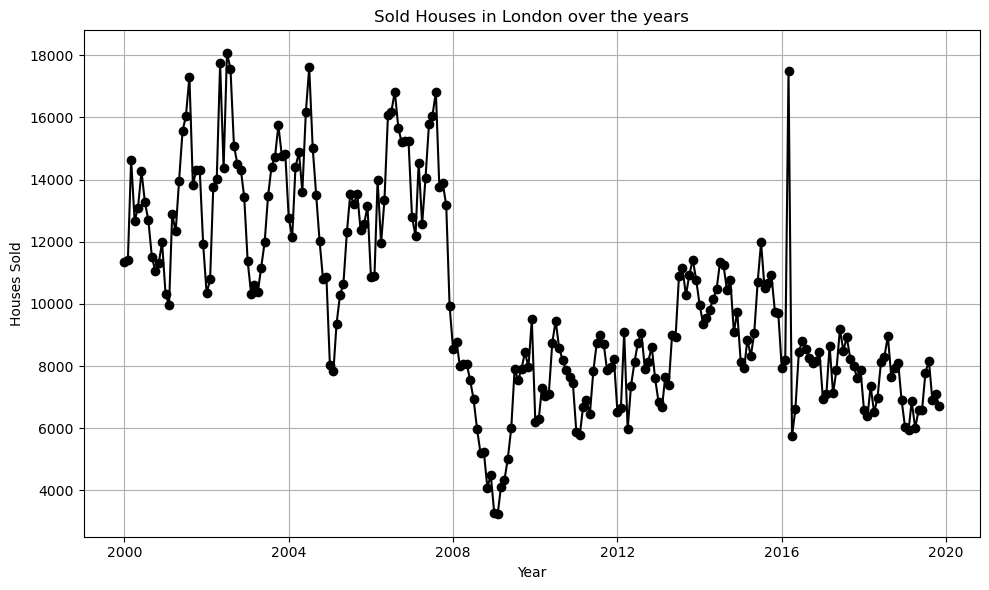

In [13]:
 # The data is taken only from 2000 to 2019 because the yearly dataset doesnot have annual data from 1995 to 2000.
filtered_data = sold_house_df[(sold_house_df['Date'] >= '2000-01-01') &(sold_house_df['Date'] < '2019-12-01')]

# Extract x and y data
dates = filtered_data['Date']
houses_sold = filtered_data['Houses Sold']

# Create the line chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(dates, houses_sold, marker='o', linestyle='-', color='black')

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Houses Sold')
plt.title('Sold Houses in London over the years')

plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()

##### From this plot, the two things that most grabs our attention is the sharp decrease occured in the 2007-2008 period and the unusual surge that occured in March/2016. From a search on Google we can see that:

##### The Sharp decrease seen in the 2007-2008 period was due to the global financial crisis.
##### The surge in March/2016 occured because of a rush to beat an increase in the tax bill on buying a second home, that came into effect in April/2016. 

In [14]:
avg_price_df = df[df['area'].isin(['south east', 'north east', 'north west',
                                    'yorks and the humber', 'east midlands', 
                                    'east of england', 'london', 'south west', 'west midlands'])] \
                            .filter(['date','area','average_price']) \
                            .rename(columns={'date':'Date','area':'Region','average_price':'Average Price'}) \
                            .sort_values(by='Date')

avg_price_df.head()

,Date,Region,Average Price
12045,1995-01-01,east of england,56702
12346,1995-01-01,london,74436
11443,1995-01-01,east midlands,45545
11744,1995-01-01,west midlands,48528
10841,1995-01-01,north west,43958


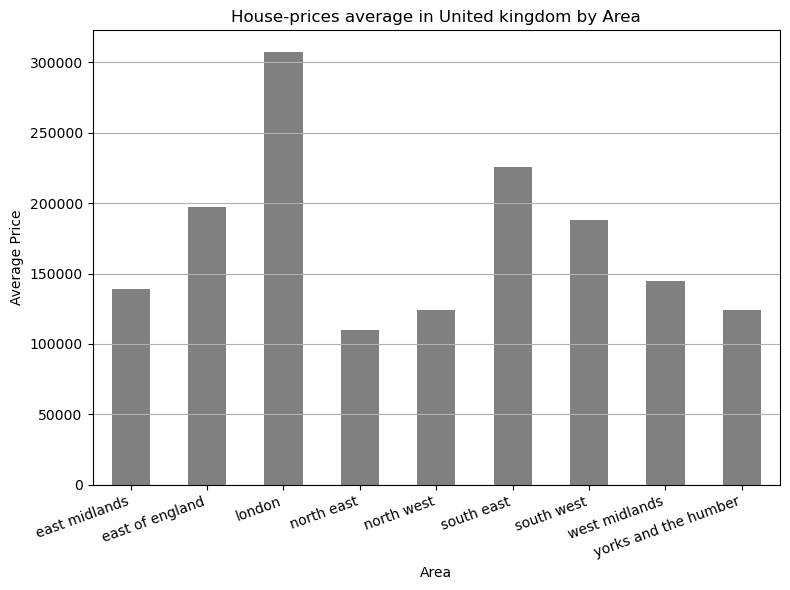

In [48]:
filtered_data = avg_price_df[(avg_price_df['Date'] >= '2000-01-01') & (avg_price_df['Date'] < '2019-12-01')]

# Group data by region and calculate the average price for each region
average_prices_by_region = filtered_data.groupby('Region')['Average Price'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
average_prices_by_region.plot(kind='bar', color='gray')

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.title('House-prices average in United kingdom by Area')
plt.xticks(rotation=20, ha='right')

# Display the plot
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout
plt.show()

In [17]:
df.drop(['code'], axis=1, inplace=True)

In [18]:
# As we do not have any information on yearly based data from 1995 to 1999.
# We are not considering it for merging the data.
df3 = df.groupby(['area', 'Year']).mean().round().reset_index()
print(df3.head())
final_df = pd.merge(df3, df1, on=['area', 'Year'])
final_df.drop(['code','borough_flag_x','date_x','date_y'], axis=1, inplace=True)
final_df.rename(columns={'borough_flag_y': 'borough_flag'}, inplace=True)
final_df.head()

                   area  Year                date  average_price  houses_sold  \
0  barking and dagenham  1995 1995-06-16 12:00:00        51818.0        123.0   
1  barking and dagenham  1996 1996-06-16 08:00:00        51718.0        157.0   
2  barking and dagenham  1997 1997-06-16 12:00:00        55974.0        203.0   
3  barking and dagenham  1998 1998-06-16 12:00:00        60286.0        208.0   
4  barking and dagenham  1999 1999-06-16 12:00:00        65321.0        224.0   

   no_of_crimes  borough_flag  
0        1599.0           1.0  
1        1599.0           1.0  
2        1599.0           1.0  
3        1599.0           1.0  
4        1599.0           1.0  


,area,Year,average_price,houses_sold,no_of_crimes,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,barking and dagenham,1999,65321.0,224.0,1599.0,21480.0,7.0,23620.0,3.0,162444.0,55632.0,3780.0,71065.0,1
1,barking and dagenham,2000,77550.0,234.0,1599.0,22618.0,7.0,24696.0,4.0,163893.0,57000.0,3780.0,71065.0,1
2,barking and dagenham,2001,88664.0,267.0,1706.0,22323.0,7.0,26050.0,3.0,165654.0,54000.0,3780.0,68298.0,1
3,barking and dagenham,2002,112222.0,287.0,1670.0,24813.0,7.0,26653.0,3.0,166357.0,52000.0,3780.0,68526.0,1
4,barking and dagenham,2003,142499.0,301.0,1757.0,25358.0,7.0,27792.0,5.0,166210.0,55000.0,3780.0,68837.0,1


In [19]:
final_df.iloc[0,1:]

Year                     1999
average_price         65321.0
houses_sold             224.0
no_of_crimes           1599.0
median_salary         21480.0
life_satisfaction         7.0
mean_salary           23620.0
recycling_pct             3.0
population_size      162444.0
number_of_jobs        55632.0
area_size              3780.0
no_of_houses          71065.0
borough_flag                1
Name: 0, dtype: object

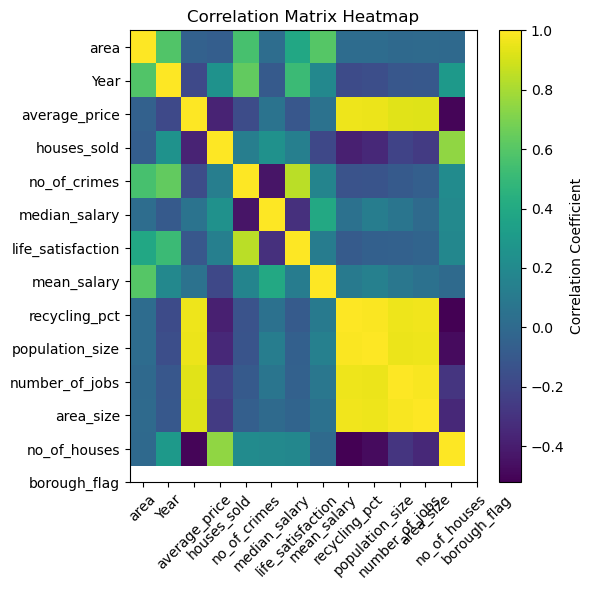

In [20]:

col = final_df.columns[0:]
# Plotting the heatmap
plt.figure(figsize=(6, 6))
plt.imshow(final_df.iloc[:,1:].corr(), cmap='viridis', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix Heatmap')

plt.xticks(np.arange(len(final_df.iloc[0,:])),col , rotation=45)
plt.yticks(np.arange(len(final_df.iloc[0,:])), col)
plt.tight_layout()
plt.show()

##### There is correlation between average price column and the recycling_pct,population size, number of jobs which may impact the model.  

In [21]:

# Initialize LabelEncoder
model_df = final_df.copy()
label_encoder = LabelEncoder()
model_df['area'] = label_encoder.fit_transform(model_df['area'])
model_df

,area,Year,average_price,houses_sold,no_of_crimes,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,0,1999,65321.0,224.0,1599.0,21480.0,7.0,23620.0,3.0,162444.0,55632.0,3780.0,71065.0,1
1,0,2000,77550.0,234.0,1599.0,22618.0,7.0,24696.0,4.0,163893.0,57000.0,3780.0,71065.0,1
2,0,2001,88664.0,267.0,1706.0,22323.0,7.0,26050.0,3.0,165654.0,54000.0,3780.0,68298.0,1
3,0,2002,112222.0,287.0,1670.0,24813.0,7.0,26653.0,3.0,166357.0,52000.0,3780.0,68526.0,1
4,0,2003,142499.0,301.0,1757.0,25358.0,7.0,27792.0,5.0,166210.0,55000.0,3780.0,68837.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,42,2015,964643.0,244.0,4085.0,39392.0,8.0,53316.0,17.0,242299.0,756000.0,2203.0,121116.0,1
899,42,2016,995543.0,219.0,4184.0,40000.0,8.0,53888.0,17.0,247614.0,765000.0,2203.0,122024.0,1
900,42,2017,1064772.0,213.0,4768.0,42152.0,8.0,59878.0,19.0,244796.0,754000.0,2203.0,123366.0,1
901,42,2018,1020026.0,174.0,5259.0,43015.0,8.0,63792.0,22.0,255324.0,775000.0,2203.0,124509.0,1


# Model Building

In [22]:
# Split df into X and y
y = model_df['houses_sold']
X = model_df.drop('houses_sold', axis=1)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Linaer model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

# prediction on the test data 
y_pred = regressor.predict(X_test) 

In [23]:
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

      Actual     Predicted
863   8953.0  10039.932195
883    518.0   1035.904396
877   6988.0   8075.015338
783    317.0    590.326092
525    461.0   1281.611228
..       ...           ...
257    470.0    580.657621
161    404.0   -924.196779
719  17186.0  11372.508671
690    230.0   -102.872928
507    523.0    534.973468

[271 rows x 2 columns]


In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 1440.7502100562792


In [25]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Root mean square error is:',rmse)

print('R square score of the model:',regressor.score(X_test, y_test))

Root mean square error is: 3802.725463124702
R square score of the model: 0.8981995956985591


# Conclusion:

###### The performance of the model is given by 0.89 and the errors can be reduced if we had more data.